In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras.backend as K

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import * 
from tensorflow.keras.models import * 
from tensorflow.keras.optimizers import * 
from tensorflow.keras.metrics import * 


This notebook is inspired by [Temporal Fusion Transformers](https://arxiv.org/pdf/1912.09363) architecture

In [6]:
df    = pd.read_csv('../data/clean.csv', index_col=0)
train = df[df.index < '2015-01-01']
test  = df[df.index >= '2015-01-01']

In [14]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [8]:
def create_sequences(data, t = 30):
    X = []
    y = []
    for i in range(t, len(data) - t):
        X.append(data[i-30:i])
        y.append(data[i:i+30])
    return np.array(X), np.array(y)
X, y = create_sequences(scaled_data)

In [9]:
X.shape, y.shape

((1034, 30, 25), (1034, 30, 25))

In [24]:
def enc_dec(hidden=64):
    i = Input((30, 25))
    x = LSTM(hidden)(i)
    x = RepeatVector(30)(x)
    x = LSTM(hidden, return_sequences=True)(x)
    x = Dropout(0.1)(x)
    x = TimeDistributed(Dense(25))(x)
    return Model(inputs=[i],outputs=[x])
model = enc_dec()

In [25]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 30, 25)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        23,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_2 (RepeatVector)  │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 30, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 30, 25)         │         1,625 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,689 (225.35 KB)

 Trainable params: 57,689 (225.35 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0134 - root_mean_squared_error: 0.1563 - val_loss: 0.0091 - val_root_mean_squared_error: 0.1457
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0089 - root_mean_squared_error: 0.1433 - val_loss: 0.0083 - val_root_mean_squared_error: 0.1446
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0084 - root_mean_squared_error: 0.1436 - val_loss: 0.0081 - val_root_mean_squared_error: 0.1443
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0081 - root_mean_squared_error: 0.1414 - val_loss: 0.0080 - val_root_mean_squared_error: 0.1429
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0080 - root_mean_squared_error: 0.1415 - val_loss: 0.0080 - val_root_mean_squared_error: 0.1422
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0080 - root_mean_squared_error: 0.1409 - val_loss: 0.0080 - val_root_mean_squared_error: 0.1428
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0079 - root

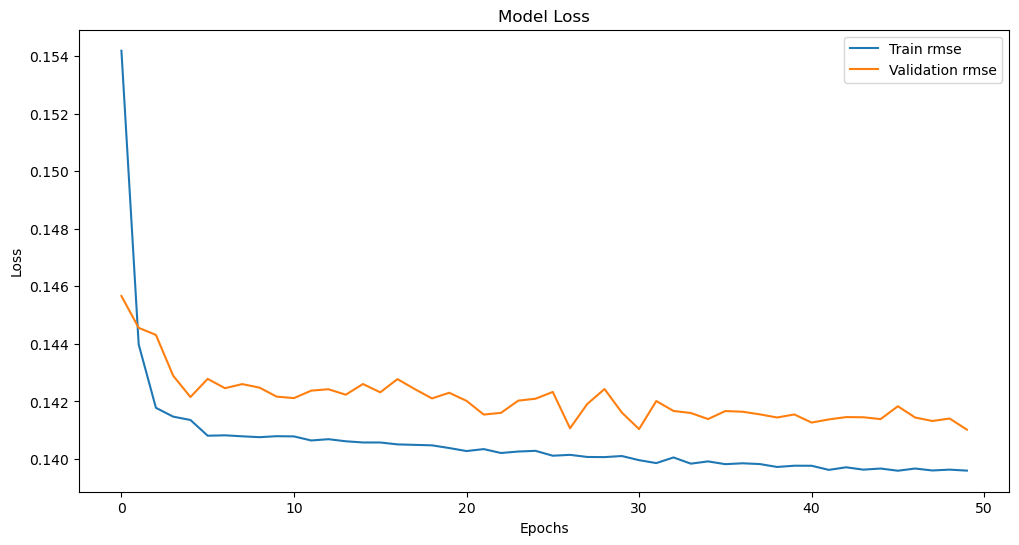

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 0.0428 - root_mean_squared_error: 0.1391 - val_loss: 0.0327 - val_root_mean_squared_error: 0.1234
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0323 - root_mean_squared_error: 0.1211 - val_loss: 0.0321 - val_root_mean_squared_error: 0.1239
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0320 - root_mean_squared_error: 0.1229 - val_loss: 0.0318 - val_root_mean_squared_error: 0.1240
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0316 - root_mean_squared_error: 0.1216 - val_loss: 0.0317 - val_root_mean_squared_error: 0.1234
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0314 - root_mean_squared_error: 0.1211 - val_loss: 0.0316 - val_root_mean_squared_error: 0.1237
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0313 - root_mean_squared_error: 0.1226 - val_loss: 0.0315 - val_root_mean_squared_error: 0.1238
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0316 - root

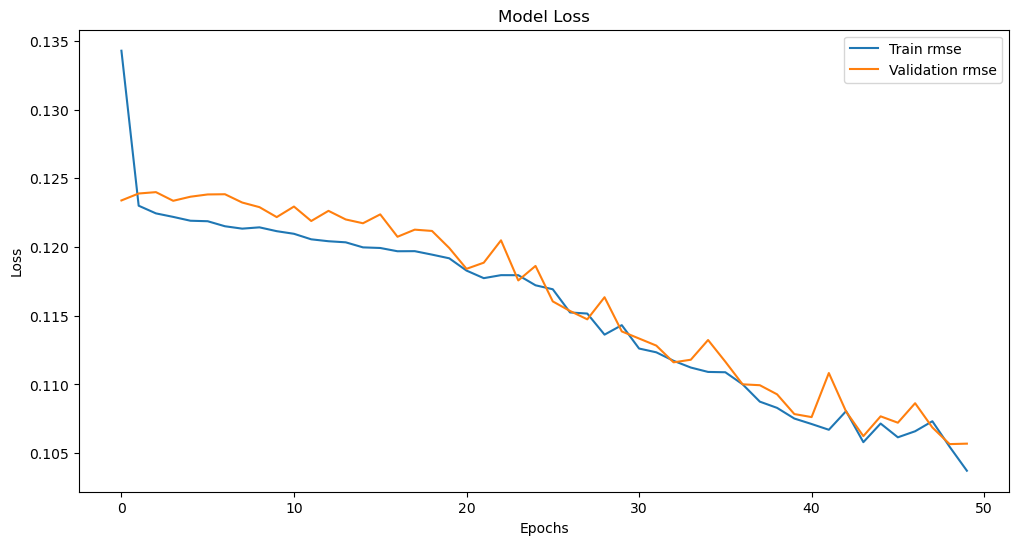

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0535 - root_mean_squared_error: 0.2125 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1685
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0271 - root_mean_squared_error: 0.1769 - val_loss: 0.0261 - val_root_mean_squared_error: 0.1692
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0257 - root_mean_squared_error: 0.1733 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1660
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0257 - root_mean_squared_error: 0.1717 - val_loss: 0.0253 - val_root_mean_squared_error: 0.1691
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0247 - root_mean_squared_error: 0.1719 - val_loss: 0.0251 - val_root_mean_squared_error: 0.1704
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0244 - root_mean_squared_error: 0.1751 - val_loss: 0.0245 - val_root_mean_squared_error: 0.1833
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0240 - root

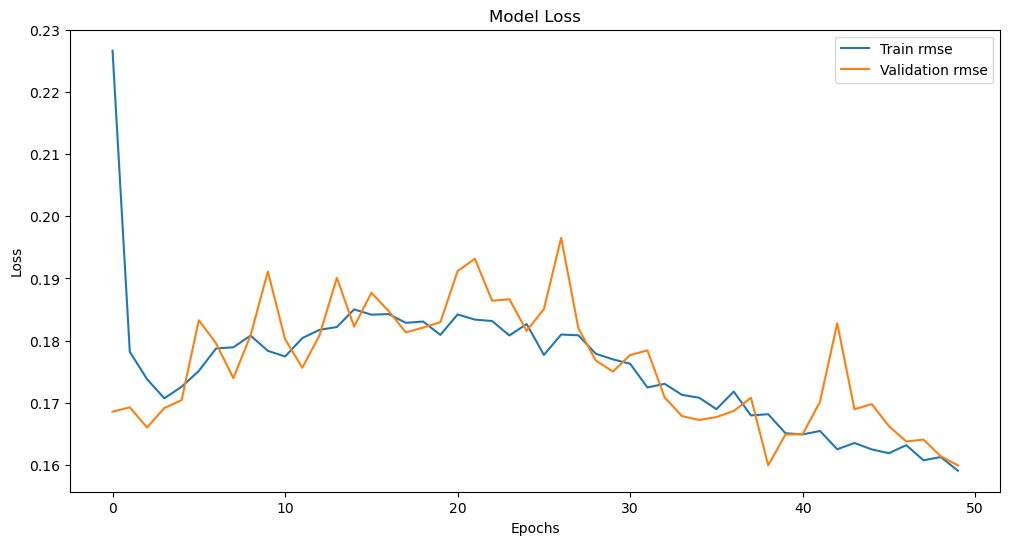

In [34]:
def tilted_loss(q,y,f):
    e = (y-f)
    return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)

models = {}
for q in [0.1, 0.5, 0.9]:
    model = enc_dec()
    opt = Adam(learning_rate=0.01)
    model.compile(loss=lambda y,f: tilted_loss(q, y, f), optimizer=opt, metrics=[RootMeanSquaredError()])
    hist = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[])
    models[q] = model
    plt.figure(figsize=(12, 6))
    plt.plot(hist.history['root_mean_squared_error'], label='Train rmse')
    plt.plot(hist.history['val_root_mean_squared_error'], label='Validation rmse')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [35]:
X, y = create_sequences(scaled_test)

In [36]:
_y = {q : model(X) for q, model in models.items()}

In [ ]:
for j in range(y.shape[0]):
    plt.figure(figsize=(100,100))
    for i in range(0, 25):
        plt.subplot(5, 5, i + 1)
        plt.plot(y[j, :, i], label = 'truth')
        for q, p in _y.items():
            plt.plot(p[j,:, i], label=f'perc({q})')
        plt.legend()
    plt.savefig(f'predictions_{j}.png')
    plt.show()
    if j > 5:
        break